# Создание признакового пространства

## Общая подготовка (импорт библиотек, модулей, ...)

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from string import punctuation
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

from collections import Counter
from sklearn.metrics import f1_score
from sklearn import model_selection, preprocessing, linear_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Conv1D, GRU, LSTM, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Загрузка и подготовка данных

In [3]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

In [4]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [6]:
# стоп-слова и знаки пунктуации ("шум")
noise = stopwords.words('russian') + list(punctuation)

In [9]:
# удаление пунктуации
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2870536


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

## Задание 1.
Задание: обучите три классификатора:

1) на токенах с высокой частотой

2) на токенах со средней частотой

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

In [8]:
# подсчет частоты токенов
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

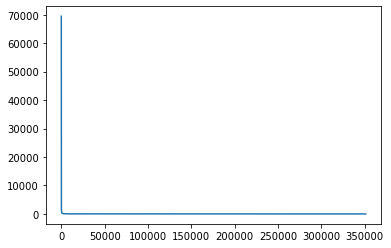

In [22]:
# частота первых 100 токенов
first_100_freqs = [freq for word, freq in freq_dict_sorted[]]
plt.plot(first_100_freqs)
plt.show()

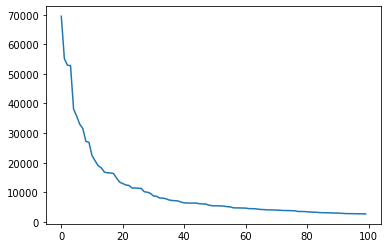

In [10]:
# частота первых 100 токенов
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

In [24]:
list(freq_dict_sorted)[:20]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860),
 ('...', 22363),
 ('меня', 20656),
 ('у', 18928),
 ('как', 18280),
 ('так', 16839),
 ('D', 16575),
 ('это', 16542),
 ('мне', 16337),
 ('все', 14763),
 ('ты', 13412)]

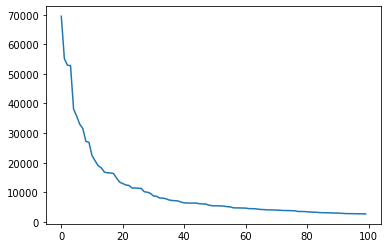

In [10]:
# частота первых 100 токенов
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

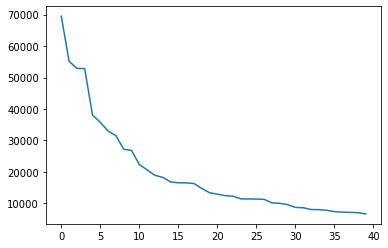

In [29]:
# частота первых 40 токенов
first_100_freqs = [freq for word, freq in freq_dict_sorted[:40]]
plt.plot(first_100_freqs)
plt.show()

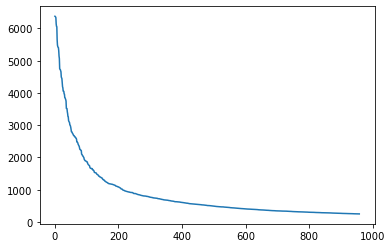

In [34]:
# частота токенов с 41 по 1000
first_100_freqs = [freq for word, freq in freq_dict_sorted[41:1000]]
plt.plot(first_100_freqs)
plt.show()

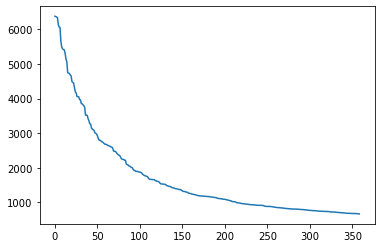

In [38]:
# частота токенов с 41 по 400
first_100_freqs = [freq for word, freq in freq_dict_sorted[41:400]]
plt.plot(first_100_freqs)
plt.show()

### Обучение классификатора на токенах с высокой частотой

In [30]:
# Токены с высокой частотой
tokens_hight = [token[0] for token in freq_dict_sorted[:40]]

In [31]:
vec = TfidfVectorizer(ngram_range=(1, 1),
                      tokenizer=word_tokenize,
                      vocabulary=tokens_hight,
                      stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


              precision    recall  f1-score   support

    negative       0.83      0.53      0.65     43321
    positive       0.30      0.64      0.41     13388

    accuracy                           0.56     56709
   macro avg       0.56      0.59      0.53     56709
weighted avg       0.70      0.56      0.59     56709



In [32]:
vec = TfidfVectorizer(ngram_range=(1, 1),
                      tokenizer=word_tokenize,
                      vocabulary=tokens_hight,
                      # stop_words=noise
                     )
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.57      0.61      0.59     26510
    positive       0.64      0.60      0.62     30199

    accuracy                           0.61     56709
   macro avg       0.60      0.61      0.60     56709
weighted avg       0.61      0.61      0.61     56709



Без чистки шума метрика лучше

### Обучение классификатора на токенах со средней частотой

In [39]:
# Токены со средней частотой
tokens_middle = [token[0] for token in freq_dict_sorted[41:250]]

In [40]:
vec = CountVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize,
                      vocabulary=tokens_middle)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.47      0.65      0.54     20202
    positive       0.75      0.59      0.66     36507

    accuracy                           0.61     56709
   macro avg       0.61      0.62      0.60     56709
weighted avg       0.65      0.61      0.62     56709



### Обучение классификатора на токенах с низкой частотой

In [41]:
# Токены с низкой частотой
tokens_low = [token[0] for token in freq_dict_sorted[250:1000]]

In [42]:
vec = CountVectorizer(ngram_range=(1, 1), 
                     tokenizer=word_tokenize,
                      vocabulary=tokens_low)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.46      0.67      0.55     19322
    positive       0.78      0.60      0.68     37387

    accuracy                           0.62     56709
   macro avg       0.62      0.64      0.61     56709
weighted avg       0.67      0.62      0.63     56709



**Вывод:** Метрика на токенах с высокой и средней частотой одинаковая, на токенах с низкой частотой - чуть выше. Правильное разбиение токенов по частоте может дать одинаковую метрику на токенах с разной частотой.

## Задание 2.
найти фичи с наибольшей значимостью, и вывести их

In [43]:
vec = TfidfVectorizer(ngram_range=(1, 1),
                      tokenizer=word_tokenize,
                      stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


              precision    recall  f1-score   support

    negative       0.77      0.78      0.77     27712
    positive       0.78      0.78      0.78     28997

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



In [44]:
feature_names = vec.get_feature_names()
count_feature = Counter(feature_names)
count_feature_sort = sorted(count_feature.items(), key=lambda x: x[1])
list(count_feature_sort)[:10]

[("''", 1),
 ('++', 1),
 ('+++', 1),
 ('+++++', 1),
 ('+++лучше', 1),
 ('+-', 1),
 ('+.по', 1),
 ('+0', 1),
 ('+0.33', 1),
 ('+1', 1)]

In [46]:
# сделаем предсказание по самой важной фиче
cool_token = "''"
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.49      0.66     56708
    positive       0.00      0.00      0.00         1

    accuracy                           0.49     56709
   macro avg       0.50      0.25      0.33     56709
weighted avg       1.00      0.49      0.66     56709



## Задание 3.
1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера

3) убедиться что для сетки нет переобучения

**CountVectorizer**


In [48]:
vec = CountVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize,
                      stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.80      0.77      0.78     29205
    positive       0.76      0.80      0.78     27504

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



**TfidfVectorizer**

In [49]:
vec = TfidfVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize, 
                      stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


              precision    recall  f1-score   support

    negative       0.77      0.78      0.77     27712
    positive       0.78      0.78      0.78     28997

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



**HashingVectorizer**

In [50]:
vec = HashingVectorizer(n_features=100, 
                        tokenizer=word_tokenize, 
                        stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


              precision    recall  f1-score   support

    negative       0.62      0.59      0.60     29174
    positive       0.59      0.61      0.60     27535

    accuracy                           0.60     56709
   macro avg       0.60      0.60      0.60     56709
weighted avg       0.60      0.60      0.60     56709



**Полносвязная сеть FNN**

In [51]:
# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [52]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
vocab_size = 10000
seq_len = 100

def custom_standardization(input_data):
    
    return input_data

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorize_layer =  TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [54]:
embedding_dim=200

model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim),
    Conv1D(200, (3)),
    Conv1D(200, (2)),
    GRU(300),
    #GlobalAveragePooling1D(),
    Dense(100, activation='relu'),
    Dense(1)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
10633/10633 [==============================] - 2666s 251ms/step - loss: 0.6933 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.4937
Epoch 2/5
10633/10633 [==============================] - 3334s 314ms/step - loss: 0.6931 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.4937
Epoch 3/5
10633/10633 [==============================] - 2819s 265ms/step - loss: 0.6931 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.4937
Epoch 4/5
10633/10633 [==============================] - 2310s 217ms/step - loss: 0.6931 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.4937
Epoch 5/5
10633/10633 [==============================] - 2294s 216ms/step - loss: 0.6931 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.4937


**Вывод:** Метрики на обучении и валидации почти равны - переобучение отсутствует

**Подбор оптимального размера для hashing векторайзера**

In [64]:
result = pd.DataFrame(columns=['n_features', 'f1_score'])
    
for i in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
    vec = HashingVectorizer(n_features=i, 
                            tokenizer=word_tokenize, 
                            stop_words=noise)
    bow = vec.fit_transform(x_train)
    clf.fit(bow, y_train)
    pred = clf.predict(vec.transform(x_test))

    f1 = f1_score(y_test, pred)
    result = result.append({'n_features': i, 'f1_score': f1}, ignore_index=True)

result.sort_values(by=['f1_score'], ascending=False)

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tok

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

,n_features,f1_score
9,10000.0,0.728273
8,9000.0,0.725520
7,8000.0,0.722075
6,7000.0,0.720245
5,6000.0,0.716451
4,5000.0,0.710166
3,4000.0,0.703751
2,3000.0,0.696210
1,2000.0,0.682423
0,1000.0,0.658861


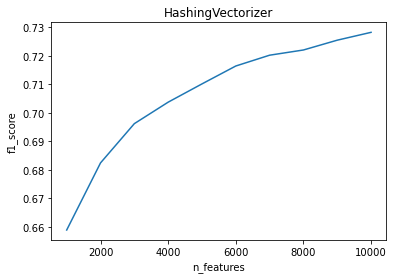

In [65]:
plt.plot(result['n_features'], result['f1_score'])
plt.title('HashingVectorizer')
plt.xlabel("n_features")
plt.ylabel("f1_score")
plt.show()

In [66]:
for i in [12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 30000, 40000, 50000]:
    vec = HashingVectorizer(n_features=i, 
                            tokenizer=word_tokenize, 
                            stop_words=noise)
    bow = vec.fit_transform(x_train)
    clf.fit(bow, y_train)
    pred = clf.predict(vec.transform(x_test))

    f1 = f1_score(y_test, pred)
    result = result.append({'n_features': i, 'f1_score': f1}, ignore_index=True)

result.sort_values(by=['f1_score'], ascending=False)

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Данила\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generat

,n_features,f1_score
20,50000.0,0.756256
19,40000.0,0.754319
18,30000.0,0.751065
16,24000.0,0.747633
17,26000.0,0.747266
15,22000.0,0.744625
14,20000.0,0.742766
13,18000.0,0.741364
12,16000.0,0.739008
11,14000.0,0.734953


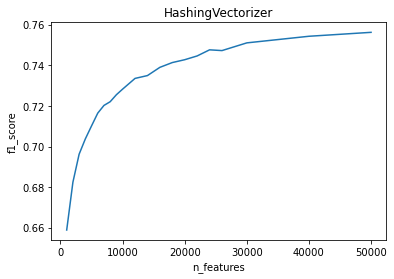

In [67]:
plt.plot(result['n_features'], result['f1_score'])
plt.title('HashingVectorizer')
plt.xlabel("n_features")
plt.ylabel("f1_score")
plt.show()

**Вывод:** С ростом числа признаков метрика улучшается. Однако зависимость нелинейная, с определенного момента скорость роста метрики замедляется, наступает насыщение, при котором увеличение числа признаков не оправдывает полученный рост метрик. В данном случае оптимальное число признаков 30000